In [11]:
import pandas as pd
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn.metrics import r2_score
from scipy.optimize import minimize
from scipy import stats
from scipy.stats import powerlognorm
from scipy.stats import lognorm
from scipy.stats import beta
from scipy.stats import gamma
#from scipy.stats import powerlaw
from scipy.stats import chi2
from scipy.stats import genpareto
from scipy.stats import expon
from scipy.stats import truncnorm
from scipy.stats import norm
from scipy.stats import gengamma

In [12]:
def fitness_GGD_fit(pars):
    a = pars[0]
    c = pars[1]
    l = pars[3]
    alpha = pars[2]

    yPred =(1/(x))*gengamma.pdf(np.log(x),a=a, c=c,  loc = l, scale=alpha)
    #yPred =gengamma.pdf(np.log(x),a=a, c=c,  loc = -l, scale=alpha)
    LL = -np.sum( stats.norm.logpdf(yPred*tot, loc=y*tot, scale=np.sqrt(tot*y*(1-y)) ) )
    #sd = pars[4]
    #LL = -np.sum(stats.norm.logpdf(yPred, loc=y, scale= sd ) )
    return(LL)

def GGD_fit(pars):
    a = pars[0]
    c = pars[1]
    l = pars[3]
    alpha = pars[2]
    yPred =(1/(x))*gengamma.pdf(np.log(x),a=a, c=c, loc = l, scale=alpha)
    #yPred =gengamma.pdf(np.log(x),a=a, c=c,  loc = -l, scale=alpha)
    return(yPred)

In [13]:
data_counts = pd.read_pickle('Covid_counts_de.pkl')

data_counts['Count'].to_pickle('Covid_counts_de2.pkl')

size_distribution = data_counts.groupby('Count')['Count'].count()
size_distribution.head()
tot = size_distribution.sum()


x = np.array(size_distribution.index)
y = np.array(size_distribution/len(data_counts))
y_or = np.array(size_distribution)

In [14]:
GGD_init = [0.15 , 1.2 , 1.64 , -0.07]
#GGD_init = [2.45, 0.52 , 0.39 ,0.07]

init_pars = GGD_init
results_GGD = minimize(fitness_GGD_fit, init_pars, method='Nelder-Mead', options={'maxiter': 10000})
sim_g = GGD_fit(results_GGD.x)
rg=r2_score(y, sim_g)
print(rg)
print(results_GGD)

0.9999983360749958
 final_simplex: (array([[ 0.26289013,  1.27634194,  1.64607929, -0.22950534],
       [ 0.26288135,  1.27637278,  1.6461055 , -0.22950377],
       [ 0.26291131,  1.27629377,  1.64598504, -0.22951261],
       [ 0.26288013,  1.2763602 ,  1.64610088, -0.22950253],
       [ 0.26288349,  1.27634711,  1.64609828, -0.22950158]]), array([2670.9069133 , 2670.90696373, 2670.90697034, 2670.90697197,
       2670.90697471]))
           fun: 2670.906913300369
       message: 'Optimization terminated successfully.'
          nfev: 691
           nit: 408
        status: 0
       success: True
             x: array([ 0.26289013,  1.27634194,  1.64607929, -0.22950534])


Text(0, 0.5, 'Number of Cascades')

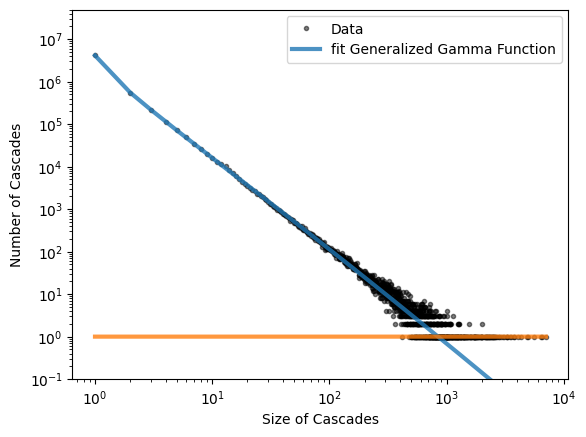

In [23]:
import matplotlib.patches as mpatches

y_un = np.full(len(x), 1)

plt.plot(x, y_or, '.', color='k', alpha=0.5, label='Data')
plt.plot(x, sim_g*5387880, '-', linewidth=3, alpha=0.8, label='fit Generalized Gamma Function')
plt.plot(x, y_un, '-', linewidth=3, alpha=0.8)

plt.legend()
#plt.grid()
#plt.xlim([-10, 200])
plt.ylim([0.1, 50e6])
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Size of Cascades")
plt.ylabel("Number of Cascades")

#plt.show()
#plt.savefig("dist.png")

In [24]:
y_or.sum()

5392367

/tmp/ipykernel_349558/1005490247.py:17: RuntimeWarning: divide by zero encountered in true_divide
  y=1/x


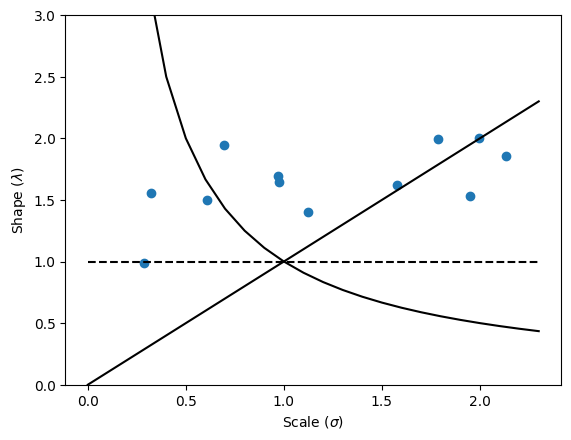

In [6]:
data = pd.read_csv('gamma_vals.txt', sep=" ", header=None)
data.columns = ["id", "a", "c", "alpha", "l"]
data.head()

a = data['a']
c = data['c']
alpha = data['alpha']

lambd = 1/pow(data['a'], 1/2)
sig = lambd/data['c']
be = data['alpha'] * pow(lambd,2)
beta = -1 * np.log(be)

plt.plot(lambd, sig, 'o', label='data')
x = np.arange(0,2.4,0.1)
plt.plot(x,x,'-', color='k')
y=1/x

z1 = len(x)
z = np.full(z1, 1)
plt.plot(x,z,'--', color='k')


plt.ylim([0, 3])
plt.plot(x, y, '-', color='k')
plt.xlabel("Scale ($\sigma$)")
plt.ylabel("Shape ($\lambda$)")

plt.savefig("cox_res.png")

In [7]:
data1_counts = pd.read_pickle('Filme_counts_pt.pkl')
data1_counts['Count'].to_pickle('Filme_counts_pt2.pkl')
size_distribution1 = data1_counts.groupby('Count')['Count'].count()
x1 = np.array(size_distribution1.index)
y1 = np.array(size_distribution1/len(data1_counts))

data2_counts = pd.read_pickle('Film_counts_nl.pkl')
data2_counts['Count'].to_pickle('Film_counts_nl2.pkl')
size_distribution2 = data2_counts.groupby('Count')['Count'].count()
x2 = np.array(size_distribution2.index)
y2 = np.array(size_distribution2/len(data2_counts))

data3_counts = pd.read_pickle('Film_counts_de.pkl')
data3_counts['Count'].to_pickle('Film_counts_de2.pkl')
size_distribution3 = data3_counts.groupby('Count')['Count'].count()
x3 = np.array(size_distribution3.index)
y3 = np.array(size_distribution3/len(data3_counts))

data4_counts = pd.read_pickle('Filme_counts_it.pkl')
data4_counts['Count'].to_pickle('Filme_counts_it2.pkl')
size_distribution4 = data4_counts.groupby('Count')['Count'].count()
x4 = np.array(size_distribution4.index)
y4 = np.array(size_distribution4/len(data4_counts))

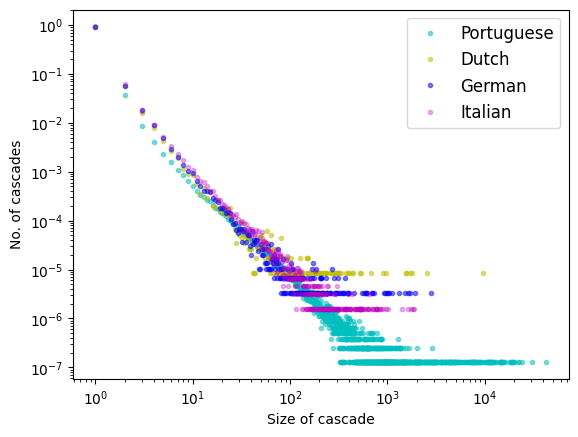

In [8]:
plt.plot(x1, y1, '.', color='c', alpha=0.5, label='Portuguese')
plt.plot(x2, y2, '.', color='y', alpha=0.5, label='Dutch')
plt.plot(x3, y3, '.', color='b', alpha=0.5, label='German')
plt.plot(x4, y4, '.', color='m', alpha=0.3, label='Italian')
plt.legend(scatterpoints=1, loc='upper right', prop={'size': 12})
plt.xlabel("Size of cascade")
plt.ylabel("No. of cascades")
plt.xscale("log")
plt.yscale("log")